In [62]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plot
import numpy as np

In [63]:
import pandas as pd

In [77]:
et = pd.read_csv("genuine_elapsed_times.csv", sep=';', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

In [78]:
for i in range(len(et)):
    et.at[i, 'read_speed'] = et.mb_per_process[i] * et.nb_processes[i] / et.read_time[i]
    et.at[i, 'write_speed'] = et.mb_per_process[i] * et.nb_processes[i] / et.write_time[i]

et

,nb_processes,mb_per_process,read_time,write_time,overall_time,max_bandwidth,read_speed,write_speed
0,1,1,0.00026,0.00108,0.00134,747.8,3846.153846,925.925926
1,2,1,0.00065,0.00166,0.00230,867.9,3076.923077,1204.819277
2,3,1,0.00118,0.00227,0.00345,868.4,2542.372881,1321.585903
3,4,1,0.00165,0.00482,0.00647,618.2,2424.242424,829.875519
4,5,1,0.00163,0.00279,0.00442,1131.6,3067.484663,1792.114695
5,6,1,0.00138,0.00390,0.00528,1136.8,4347.826087,1538.461538
6,7,1,0.00274,0.00407,0.00681,1028.4,2554.744526,1719.901720
7,8,1,0.00196,0.00720,0.00916,873.6,4081.632653,1111.111111
8,1,2,0.00049,0.00134,0.00182,1096.6,4081.632653,1492.537313
9,2,2,0.00113,0.00353,0.00466,858.4,3539.823009,1133.144476


In [86]:
def plot_speeds():
    r_s, w_s, o_s = [], [], []
    for i in range(8):
        data = et[(et.nb_processes == i+1)]
        o_s.append(np.mean(data.max_bandwidth))
        r_s.append(np.mean(data.read_speed))
        w_s.append(np.mean(data.write_speed))
    plot.plot([i+1 for i in range(8)], o_s, "-", label='overall_time')
    plot.plot([i+1 for i in range(8)], r_s, "-", label='read_time')
    plot.plot([i+1 for i in range(8)], w_s, "-", label='write_time')

    plot.xlabel("Number of processes")
    plot.ylabel("mean")
    plot.legend(loc='best')

def plot_time():
    r_t, w_t, o_t = [], [], []
    for i in range(8):
        data = et[(et.nb_processes == i+1)].sum()
        o_t.append(data.overall_time)
        r_t.append(data.read_time)
        w_t.append(data.write_time)
    plot.plot([i+1 for i in range(8)], o_t, "-", label='overall_time')
    plot.plot([i+1 for i in range(8)], r_t, "-", label='read_time')
    plot.plot([i+1 for i in range(8)], w_t, "-", label='write_time')

    plot.xlabel("Number of processes")
    plot.ylabel("Total time (in s)")
    plot.legend(loc='best')

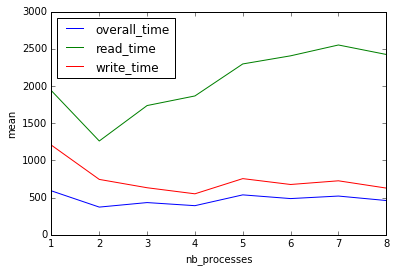

In [87]:
plot_speeds()

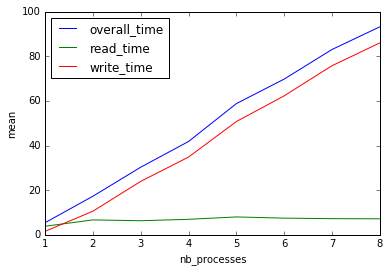

In [88]:
plot_time()